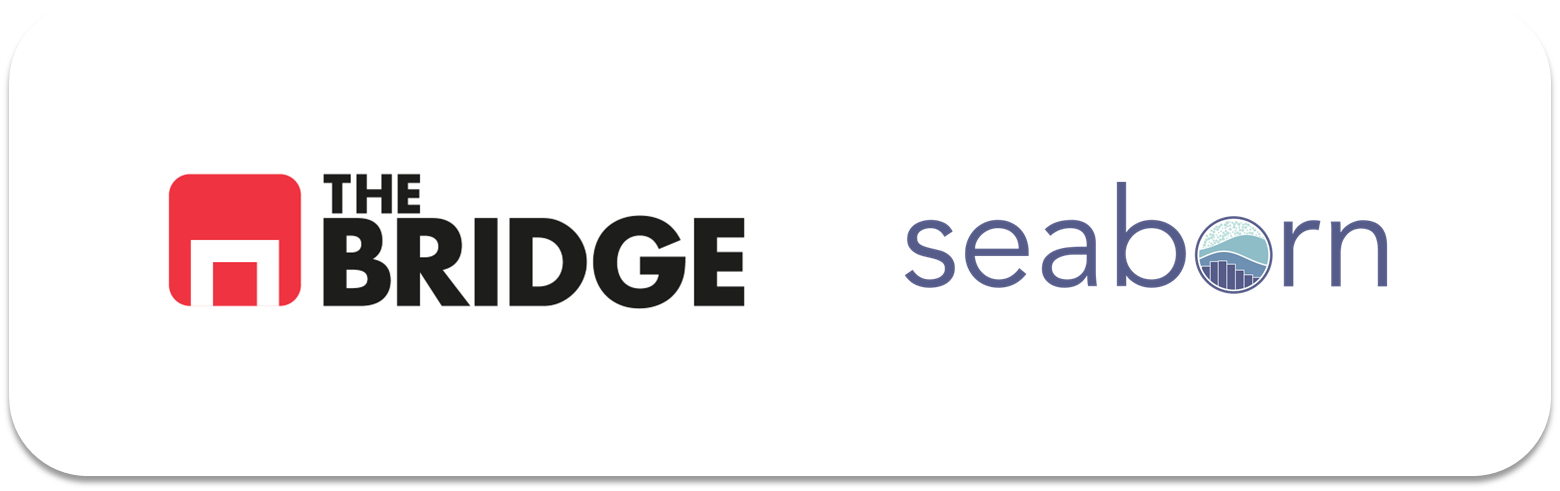

# Visualización Aplicada: Mostrando una Variable Categórica

Nos centramos ahora en visualizar una única variable (tanto para análisis como presentación). Dividimos en dos grupos categóricas y númericas. En esta sesión trataremos las categóricas.

Lo primero, importamos librerías y cargamos datos:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

### Gráficas y consideraciones

Veremos las siguientes:
- Diagrama de barras para frecuencias
- Diagrama de esferas/círculos para frecuencias
- Quesos, donuts y otras cosas de comer: lolipops


#### Consideraciones generales: 

* **Cuándo**: Análisis univariante de frecuencias y presentación de distribución de valores cuando esto aporte algo (en general para introducciones y dar contexto). Los diagramas de tarta y queso funcionan mejor con frecuencias relativas que con absolutas. Los lolipops no son de mi gusto, pero para que tengas otros.

* **Cuándo no**: Incluso en la situación de que sea necesario por dar contexto hablar de los valores de una variable categórica, si la cardinalidad es mayor de 5 (más o menos) reducirla mostrando 4-5 valores como mucho colapsando los no interesantes en un grupo "otros" (ojo, los no interesantes no son los de menor frecuencia son los que no aporten nada a los mensajes a transmitir )

### Barras

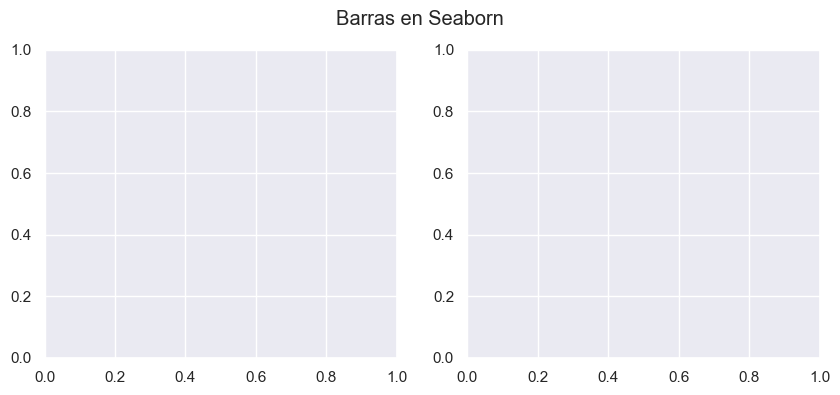

In [6]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
fig.suptitle("Barras en Seaborn");



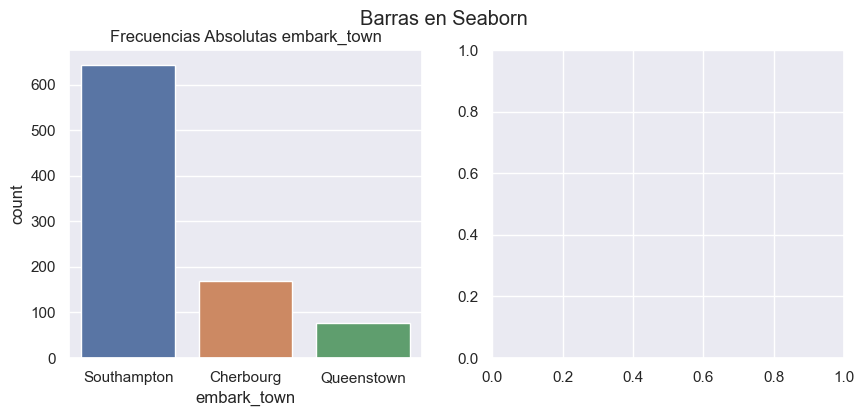

In [8]:
### Countplot, nos permite frecuencias
sns.countplot(x ="embark_town", data= df_titanic, ax= axs[0], hue= "embark_town", legend = False)
axs[0].set_title("Frecuencias Absolutas embark_town")
fig

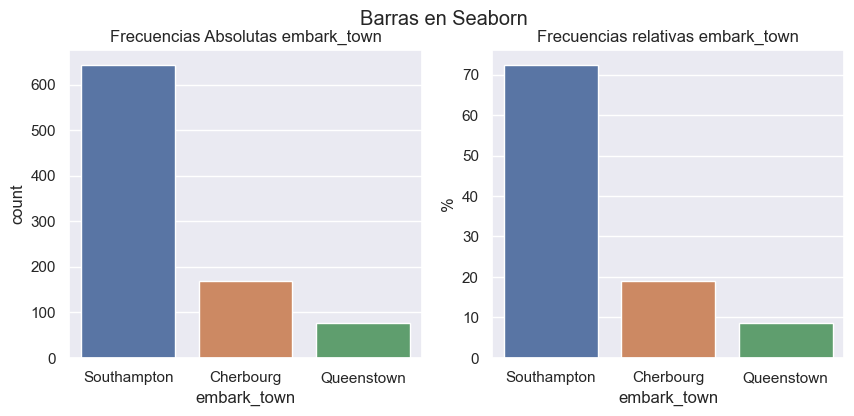

In [9]:
# Para frecuencias relativas... también hay que calcularlas previamente y puedes usar el barplot (si parecido a matplotlib)
valores = df_titanic.embark_town.value_counts(normalize = True) * 100
sns.barplot(x = valores.index, y = valores.values, hue = valores.index, ax = axs[1])
axs[1].set_title("Frecuencias relativas embark_town")
axs[1].set_ylabel("%")
fig

### Circulos

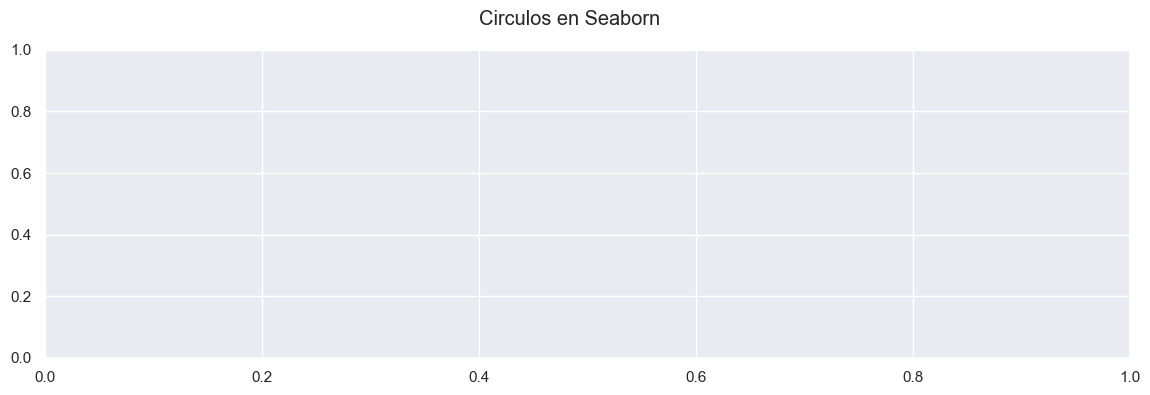

In [10]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=1,figsize=(14,4))
fig.suptitle("Circulos en Seaborn");

In [12]:
df_seguros

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
df_seguros.state.value_counts()

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

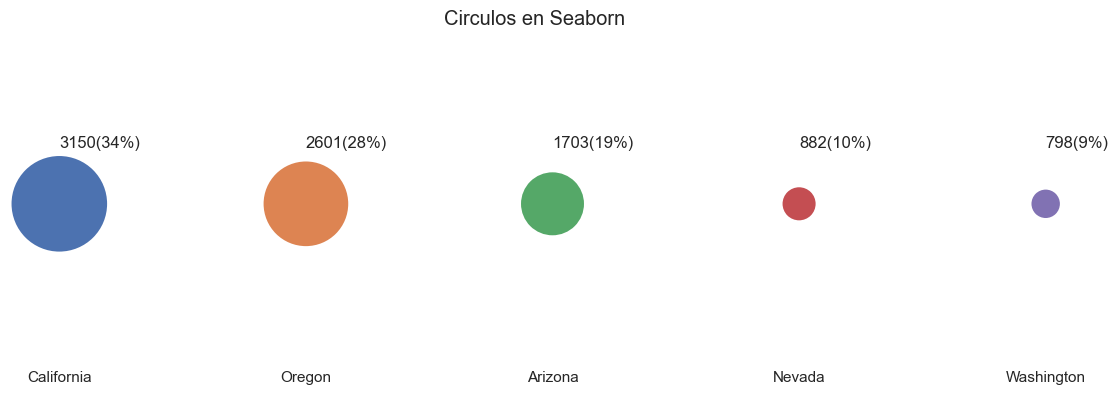

In [15]:
### Frecuencias absolutas y relativas
axs.cla()
frecuencias = df_seguros["state"].value_counts()
df_frecuencias = df_seguros["state"].value_counts().reset_index()
df_frecuencias.columns = ["categorias","frecuencias"]
sns.scatterplot(x = "categorias", y = [1]*len(frecuencias), hue = "categorias", data = df_frecuencias, size = "frecuencias", legend = False, ax = axs, sizes = (500,5000))
axs.set_xlabel("")
for estado,valor in frecuencias.items():
    axs.text(estado,1.02,f"{valor}({round(valor*100/frecuencias.sum())}%)")
axs.set_facecolor("none") #para quitar la cuadricula de fondo
axs.yaxis.set_ticks([])
fig

### Donuts, tartas, quesos

Seaborn no viene con ellos, así que usamos matplotlib, empezamos con la tarta/queso:

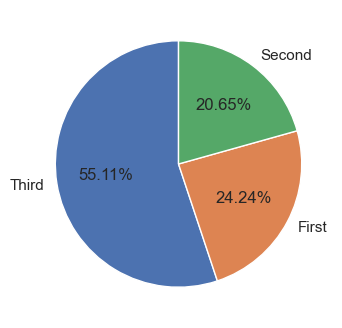

In [16]:
data = df_titanic["class"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

Ahora tipo donut:

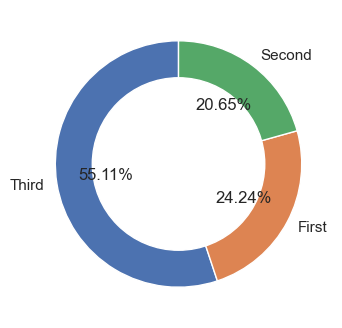

In [26]:
my_circle = plt.Circle( (0,0),
                       0.5, #grosor del donut
                       color = "white")
ax.add_artist(my_circle)
fig

### Lolipops

Este tampoco lo tenemos en seaborn:

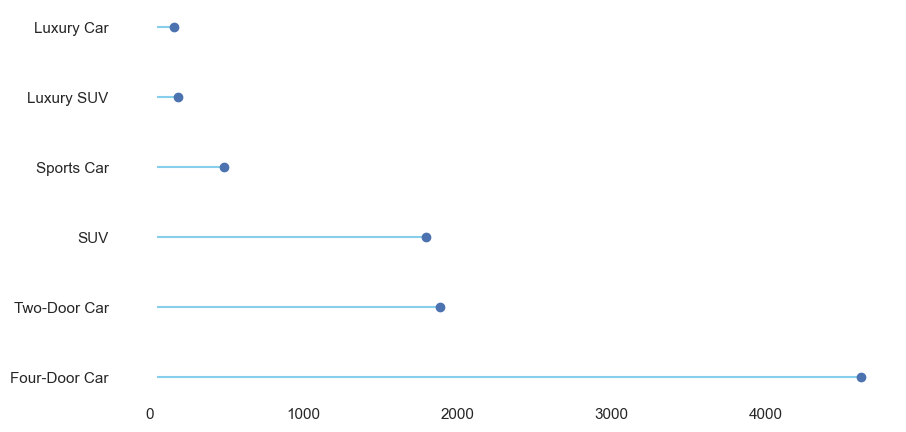

In [27]:
conteo = df_seguros['vehicle_class'].value_counts(ascending=False)

plt.figure(figsize=(10,5))
plt.hlines(y=conteo.index,
           xmin= 50,
           xmax=conteo,
           color='skyblue')
p=plt.gcf()
p.gca().set_facecolor("none")
plt.plot(conteo, conteo.index, "o");
